In [2]:
""" The k-NN algorithm is simple but powerful.
The advantage is that it requires no model training to make predictions, whereas this is usually the most complicated part of a Machine Learning algorithm. 
It is used in many fields, including: pattern recognition, compression algorithms, target marketing.

On the other hand, it is a very memory-intensive classifier, sensitive to irrelevant and correlated attributes.
For a large dataset, the prediction will be slow because the algorithm goes through all the data in the training sample for each individual to be classified. """
from sklearn import neighbors, datasets
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np

digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

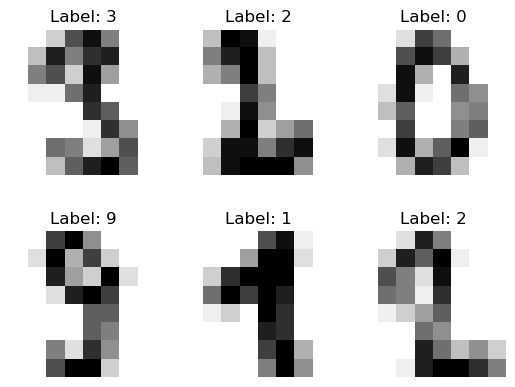

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm # to import new colored cards

j=0

for i in np.random.choice(np.arange(0, len(y_digits)), size=6):
    j=j+1
#We store the index in the list i to be able to display the corresponding label later.
    
    plt.subplot(2,3,j)
# Adding *plt.subplot(2,3,j)* at each iteration allows to display all images
# together on the same figure.

    plt.axis('off')
# Allows to remove the axes (here is used to better see the titles)
    
    plt.imshow(digits.images[i],cmap = cm.binary, interpolation='None')
# Displays the image n°i
# The use of cm.binary allows to see the numbers in grey on a white background.

    plt.title('Label: %i' %y_digits[i])
# For each image we write in title the label that corresponds to it. 

In [6]:
# Is this state correct? I get very different results.

X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, train_size = 0.2, random_state = 126)

knn = neighbors.KNeighborsClassifier(n_neighbors=7, metric = 'minkowski')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

cm = pd.crosstab(y_test, y_pred, rownames=['Actual values'], colnames=['Predicted values'])
cm


Predicted values,0,1,2,3,4,5,6,7,8,9
Actual values,,,,,,,,,,
0,138,0,0,0,1,0,0,0,0,0
1,0,145,1,1,0,0,1,0,0,0
2,0,2,129,1,0,0,0,1,6,0
3,0,0,2,142,0,1,0,1,0,4
4,0,4,0,0,145,0,0,2,0,1
5,1,0,0,0,1,142,1,0,0,1
6,0,0,0,0,0,0,135,0,0,0
7,0,0,0,0,0,0,0,139,0,1
8,0,14,0,3,0,2,1,1,120,2


In [8]:
knn_m = neighbors.KNeighborsClassifier(n_neighbors=5, metric = 'manhattan')
knn_m.fit(X_train, y_train)
y_pred_m = knn.predict(X_test)

cm = pd.crosstab(y_test, y_pred_m, rownames=['Actual values'], colnames=['Predicted values'])
cm


Predicted values,0,1,2,3,4,5,6,7,8,9
Actual values,,,,,,,,,,
0,138,0,0,0,1,0,0,0,0,0
1,0,145,1,1,0,0,1,0,0,0
2,0,2,129,1,0,0,0,1,6,0
3,0,0,2,142,0,1,0,1,0,4
4,0,4,0,0,145,0,0,2,0,1
5,1,0,0,0,1,142,1,0,0,1
6,0,0,0,0,0,0,135,0,0,0
7,0,0,0,0,0,0,0,139,0,1
8,0,14,0,3,0,2,1,1,120,2


In [9]:
score_minkowski = knn.score(X_test, y_test)

score_manhattan = knn_m.score(X_test, y_test)

# Stimmt nicht mit den Claims überein. Manhattan performt sogar schlechter. 
print(score_manhattan, score_minkowski)

0.935326842837274 0.9464534075104312


In [12]:
## Compare different approaches. 

score_minko = []
score_man = []
score_cheb = []

for k in range(1, 41):
    knn = neighbors.KNeighborsClassifier(n_neighbors=k, metric = 'minkowski')
    knn.fit(X_train, y_train)
    score_minko.append(knn.score(X_test, y_test))

for k in range(1, 41):
    knn = neighbors.KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    knn.fit(X_train, y_train)
    score_man.append(knn.score(X_test, y_test))
    
for k in range(1, 41):
    knn = neighbors.KNeighborsClassifier(n_neighbors=k, metric='chebyshev')
    knn.fit(X_train, y_train)
    score_cheb.append(knn.score(X_test, y_test))

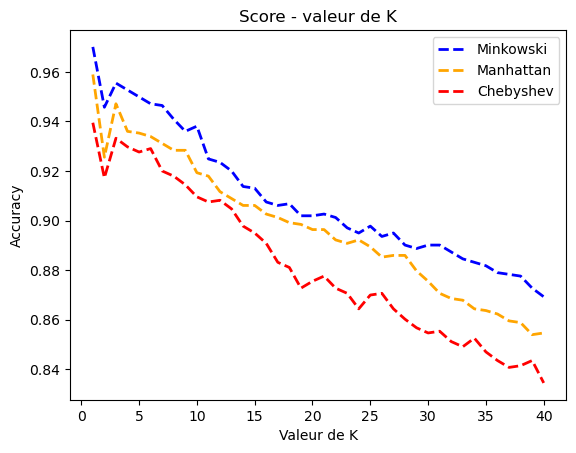

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(1, 41), score_minko, color='blue', linestyle='dashed', lw=2, label='Minkowski')
plt.plot(range(1, 41), score_man, color='orange', linestyle='dashed', lw=2, label='Manhattan')
plt.plot(range(1, 41), score_cheb, color='red', linestyle='dashed', lw=2, label='Chebyshev')
plt.title('Score - valeur de K')  
plt.xlabel('Valeur de K')  
plt.ylabel('Accuracy') 
plt.legend();